In [41]:
import pandas as pd

def import_MTA_Turnstile_Data(Int_start_month, Int_end_month):
    df =[]
    for m in range(Int_start_month, Int_end_month):
        for d in range(1,31):
            url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_19' + ('%02d') % (m,) + ('%02d') % (d,) + '.txt' 
            print('Reading file :'+ ' '+ url)
            try:
                tempDF = pd.read_csv(url)
                print('Complete')
                if len(df) < 1:
                    df = tempDF 
                else:
                    df = pd.concat([df,tempDF])
            except Exception:
                pass
    return(df)

turnstile_df = import_MTA_Turnstile_Data(2,5)

Reading file : http://web.mta.info/developers/data/nyct/turnstile/turnstile_190201.txt
Reading file : http://web.mta.info/developers/data/nyct/turnstile/turnstile_190202.txt
Complete
Reading file : http://web.mta.info/developers/data/nyct/turnstile/turnstile_190203.txt
Reading file : http://web.mta.info/developers/data/nyct/turnstile/turnstile_190204.txt
Reading file : http://web.mta.info/developers/data/nyct/turnstile/turnstile_190205.txt
Reading file : http://web.mta.info/developers/data/nyct/turnstile/turnstile_190206.txt
Reading file : http://web.mta.info/developers/data/nyct/turnstile/turnstile_190207.txt
Reading file : http://web.mta.info/developers/data/nyct/turnstile/turnstile_190208.txt
Reading file : http://web.mta.info/developers/data/nyct/turnstile/turnstile_190209.txt
Complete
Reading file : http://web.mta.info/developers/data/nyct/turnstile/turnstile_190210.txt
Reading file : http://web.mta.info/developers/data/nyct/turnstile/turnstile_190211.txt
Reading file : http://web

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

Concatinating Stations and Lines:

In [43]:
turnstile_df['STATION'] = turnstile_df['STATION'] + "_"+ turnstile_df['LINENAME']

In [44]:
df.DATE.unique()

array(['01/26/2019', '01/27/2019', '01/28/2019', '01/29/2019',
       '01/30/2019', '01/31/2019', '02/01/2019', '02/02/2019',
       '02/03/2019', '02/04/2019', '02/05/2019', '02/06/2019',
       '02/07/2019', '02/08/2019', '02/09/2019', '02/10/2019',
       '02/11/2019', '02/12/2019', '02/13/2019', '02/14/2019',
       '02/15/2019', '02/16/2019', '02/17/2019', '02/18/2019',
       '02/19/2019', '02/20/2019', '02/21/2019', '02/22/2019',
       '02/23/2019', '02/24/2019', '02/25/2019', '02/26/2019',
       '02/27/2019', '02/28/2019', '03/01/2019', '03/02/2019',
       '03/03/2019', '03/04/2019', '03/05/2019', '03/06/2019',
       '03/07/2019', '03/08/2019', '03/09/2019', '03/10/2019',
       '03/11/2019', '03/12/2019', '03/13/2019', '03/14/2019',
       '03/15/2019', '03/16/2019', '03/17/2019', '03/18/2019',
       '03/19/2019', '03/20/2019', '03/21/2019', '03/22/2019',
       '03/23/2019', '03/24/2019', '03/25/2019', '03/26/2019',
       '03/27/2019', '03/28/2019', '03/29/2019', '03/30

In [45]:
turnstile_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST_NQR456W,NQR456W,BMT,01/26/2019,03:00:00,REGULAR,6922652,2347673
1,A002,R051,02-00-00,59 ST_NQR456W,NQR456W,BMT,01/26/2019,07:00:00,REGULAR,6922669,2347688
2,A002,R051,02-00-00,59 ST_NQR456W,NQR456W,BMT,01/26/2019,11:00:00,REGULAR,6922747,2347773
3,A002,R051,02-00-00,59 ST_NQR456W,NQR456W,BMT,01/26/2019,15:00:00,RECOVR AUD,6922932,2347849
4,A002,R051,02-00-00,59 ST_NQR456W,NQR456W,BMT,01/26/2019,19:00:00,REGULAR,6923237,2347911


In [46]:
turnstile_df.columns = [i.strip() for i in turnstile_df.columns]

In [47]:
turnstile_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

Creating Datetime column:

In [48]:

turnstile_df['dateTime'] = pd.to_datetime(turnstile_df.DATE +' '+ turnstile_df.TIME, format='%m/%d/%Y %H:%M:%S')

First I implemented group by function to target a specific turnstile, then calculated the difference between entries/exits to get incremental entries and exits: 

In [56]:
key = ['C/A',
'UNIT',
'SCP',
'STATION']

def getDiff(turnstile_df):
    turnstile_df = turnstile_df.sort_values('dateTime')
    turnstile_df['Incr_ENTRIES'] =  turnstile_df.ENTRIES - turnstile_df.ENTRIES.shift(1)
    turnstile_df['Incr_EXITS'] = turnstile_df.EXITS - turnstile_df.EXITS.shift(1)
    return(turnstile_df)


newDF = turnstile_df.groupby(key, as_index=False).apply(lambda x: getDiff(x)).reset_index()

In [58]:
newDF = newDF[list(turnstile_df.columns.values) + ['Incr_ENTRIES', 'Incr_EXITS']]

Adjusting for Outliers: 

In [59]:
newDF.DESC.value_counts()

REGULAR       2631802
RECOVR AUD      13001
Name: DESC, dtype: int64

Deleting audit values:

In [60]:
newDF = newDF[newDF.DESC != 'RECOVR AUD']

Getting rid of outliers by removing negative incremental entries and exits: 

In [61]:
newDF = newDF.loc[(newDF['Incr_ENTRIES']>0) & (newDF['Incr_EXITS']>0),]

In [62]:
newDF['Incr_ENTRIES'].describe()

count    2.135612e+06
mean     8.941246e+03
std      3.335233e+06
min      1.000000e+00
25%      3.000000e+01
50%      1.100000e+02
75%      2.780000e+02
max      2.088503e+09
Name: Incr_ENTRIES, dtype: float64

In [63]:
newDF['totalFootTraffic'] = newDF['Incr_ENTRIES'] + newDF['Incr_EXITS']

In [29]:
key = ['C/A',
'UNIT',
'SCP',
'STATION']

newDF.groupby(['STATION']).totalFootTraffic.agg(['sum']).sort_values('sum', ascending=False).head(20)
#newDF.groupby(key, as_index=False).totalFootTraffic.agg(['sum']).sort_values('sum', ascending=False).reset_index()
#newDF.groupby(key, as_index=False).totalFootTraffic.agg(['sum']).sort_values('sum', ascending=False).reset_index()

,sum
STATION,
125 ST_456,3.908938e+09
B'WAY-LAFAYETTE_BDFQ6,3.810564e+09
103 ST_6,3.774656e+09
CYPRESS AV_6,3.281471e+09
66 ST-LINCOLN_1,2.001075e+09
GRD CNTRL-42 ST_4567S,1.836599e+09
FRANKLIN ST_1,1.835178e+09
BEACH 25 ST_A,1.604993e+09
86 ST_456,1.235603e+09


In [64]:
newDF.Incr_ENTRIES.describe()

count    2.135612e+06
mean     8.941246e+03
std      3.335233e+06
min      1.000000e+00
25%      3.000000e+01
50%      1.100000e+02
75%      2.780000e+02
max      2.088503e+09
Name: Incr_ENTRIES, dtype: float64

Removing rows where the difference between two adjacent lines is very large:

In [65]:
newDF = newDF.loc[(newDF.Incr_ENTRIES < 20000) & (newDF.Incr_EXITS < 20000),]

In [66]:
newDF.Incr_ENTRIES.describe()

count    2.135488e+06
mean     2.052787e+02
std      2.648451e+02
min      1.000000e+00
25%      3.000000e+01
50%      1.100000e+02
75%      2.780000e+02
max      1.911300e+04
Name: Incr_ENTRIES, dtype: float64

In [70]:
newDF[(newDF.STATION =='125 ST_456')].totalFootTraffic.describe()

count    6617.000000
mean      600.283361
std       414.217628
min         2.000000
25%       248.000000
50%       547.000000
75%       896.000000
max      2604.000000
Name: totalFootTraffic, dtype: float64

In [71]:
newDF.groupby(['STATION']).totalFootTraffic.agg(['sum']).sort_values('sum', ascending=False).head(10)

,sum
STATION,
GRD CNTRL-42 ST_4567S,21466461.0
34 ST-HERALD SQ_BDFMNQRW,17405375.0
34 ST-PENN STA_ACE,12017739.0
42 ST-PORT AUTH_ACENQRS1237W,10998207.0
14 ST-UNION SQ_LNQR456W,10612303.0
TIMES SQ-42 ST_1237ACENQRSW,10090555.0
FULTON ST_2345ACJZ,9125459.0
47-50 STS ROCK_BDFM,8959848.0
59 ST COLUMBUS_ABCD1,8573097.0


10 BUSIEST STATIONS: 

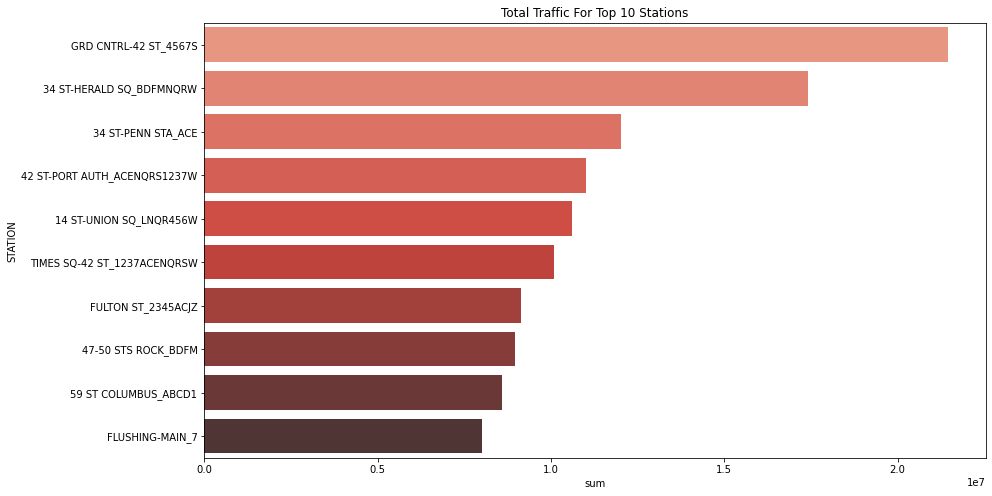

In [73]:
plt.figure(figsize=(14, 8))
plt.title("Total Traffic For Top 10 Stations")
graph1DF = newDF.groupby(['STATION']).totalFootTraffic.agg(['sum']).reset_index()
graph1DF = graph1DF.nlargest(10,'sum')
sns.barplot(x="sum", y="STATION", orient = "h", data=graph1DF, palette = "Reds_d")
plt.savefig('10TopStations.png', dpi = 1000)